In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

Prices=pd.read_csv('PriceStats_CPI.csv',keep_default_na=True)
Prices=Prices.dropna(axis=0)
BER=pd.read_csv('T10YIE.csv',keep_default_na=True)

#nIndex = [(year-2008)*12]+month  remember all dayly CPI values of the month are equal
#Prices['nIndex']=(pd.DatetimeIndex(Prices['date']).year-min(pd.DatetimeIndex(Prices['date']).year))*12+pd.DatetimeIndex(Prices['date']).month
#df=Prices.groupby('nIndex').first().reset_index()

#Intentando otra forma de agrupar por año,mes
Prices['date'] = pd.to_datetime(Prices['date'])
Prices['year']=pd.DatetimeIndex(Prices['date']).year
Prices['month']=pd.DatetimeIndex(Prices['date']).month
Prices['day']=pd.DatetimeIndex(Prices['date']).day
df=Prices.groupby(['year','month']).first().reset_index()   #main dataframe

#df=df.set_index('date')
Prices

,date,PriceStats,CPI,year,month,day
0,2008-07-24,100.00000,100.0000,2008,7,24
1,2008-07-25,99.99767,100.0000,2008,7,25
2,2008-07-26,99.92376,100.0000,2008,7,26
3,2008-07-27,99.91537,100.0000,2008,7,27
4,2008-07-28,99.89491,100.0000,2008,7,28
...,...,...,...,...,...,...
4082,2019-09-27,118.16530,117.2488,2019,9,27
4083,2019-09-28,118.15530,117.2488,2019,9,28
4084,2019-09-29,118.16150,117.2488,2019,9,29
4085,2019-09-30,118.17040,117.2488,2019,9,30


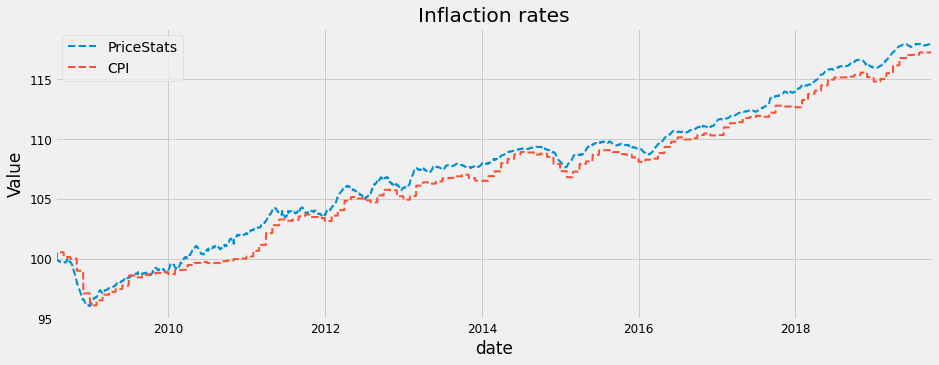

In [2]:
ddl = Prices.drop(['year','month','day'], axis=1)
ddl=ddl.set_index('date')
plt.style.use('fivethirtyeight')
ax=ddl.plot(figsize=(14,5),fontsize = 12,linewidth = 2,linestyle='--')#(color='blue')
ax.set_xlabel('date')
ax.set_ylabel('Value')
ax.set_title('Inflaction rates')
plt.show()

Inflation Rate from CPI

Note that CPI is not a rate by itself while BER is. In order to make the different data sets comparable and use them together, we must first transform the data. One way to do this is to calculate monthly inflation rates from the different data sets given to us:

How might you calculate monthly inflation rates from the CPI data?

The monthly inflation rate can be calculated as the percentage change of CPI per month:

IRt=(CPIt−CPIt−1)/CPIt−1
 
where t indexes the months.

Plot the monthly inflation rate calculated by the formula above and report below the value for February, 2013 .

(Enter as a percentage, e.g. if the inflation is 5%, enter "5". Enter an answer accurate to at least 2 decimal places.)

In [3]:
IRc=[]
lIRc=[]
CPIt_1=df.iloc[0]['CPI']
for i in range (len(df)):
    CPIt=df.iloc[i]['CPI']
    IR=((CPIt-CPIt_1)/CPIt_1)*100
    lIR=(np.log(CPIt)-np.log(CPIt_1))*100
    CPIt_1=CPIt
    IRc.append(IR)
    lIRc.append(lIR)
df['IR']=IRc
df['lIR']=lIRc

In [4]:
dd=df.set_index('date')
dd['2013-01':'2013-02']

,year,month,PriceStats,CPI,day,IR,lIR
date,,,,,,,
2013-01-01,2013,1,105.9069,104.9293,1,-0.269264,-0.269627
2013-02-01,2013,2,106.4377,105.2396,1,0.295723,0.295287


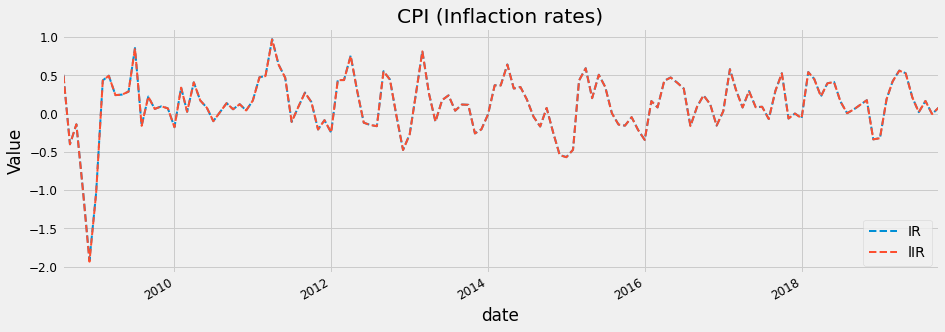

In [5]:
#ddx = dd.drop(['nIndex','CPI','PriceStats'], axis=1)
ddx = dd.drop(['year','month','day','CPI','PriceStats'], axis=1)
plt.style.use('fivethirtyeight')
ax=ddx.plot(figsize=(14,5),fontsize = 12,linewidth = 2,linestyle='--')#(color='blue')
ax.set_xlabel('date')
ax.set_ylabel('Value')
ax.set_title('CPI (Inflaction rates)')
plt.show()


WRITTEN
1.- Repeat the model fitting and evaluation procedure from the previous page for the monthly inflation rate computed from CPI.

Your response should include:

(1 point) Description of how you compute the monthly inflation rate from CPI and a plot of the monthly inflation rate.

(2 points) Description of how the data has been detrended and a plot of the detrended data. (You may choose to work with log of the CPI for later convenience.)

(3 points) Statement of and justification for the chosen AR(p) model. Include plots and reasoning.

(3 points) Description of the final model; computation and plots of the 1 month-ahead forecasts for the validation data. In your plot, overlay predictions on top of the data.

2.- (3 points) Which AR(p) model gives the best predictions? Include a plot of the RSME againt different lags p for the model.

RESPONSE

1.- Repeat the model fitting and evaluation procedure from the previous page for the monthly inflation rate computed from CPI.
a.- (1 point) Description of how you compute the monthly inflation rate from CPI and a plot of the monthly inflation rate.

In [6]:
IRc=[]
lIRc=[]
CPIt_1=df.iloc[0]['CPI']
for i in range (len(df)):
    CPIt=df.iloc[i]['CPI']
    IR=((CPIt-CPIt_1)/CPIt_1)*100
    lIR=(np.log(CPIt)-np.log(CPIt_1))*100
    CPIt_1=CPIt
    IRc.append(IR)
    lIRc.append(lIR)
df['IR']=IRc
df['lIR']=lIRc
df

,year,month,date,PriceStats,CPI,day,IR,lIR
0,2008,7,2008-07-24,100.00000,100.00000,24,0.000000,0.000000
1,2008,8,2008-08-01,99.85761,100.52510,1,0.525100,0.523726
2,2008,9,2008-09-01,99.65436,100.12380,1,-0.399204,-0.400003
3,2008,10,2008-10-01,99.72428,99.98538,1,-0.138249,-0.138344
4,2008,11,2008-11-01,97.99059,98.97539,1,-1.010138,-1.015274
...,...,...,...,...,...,...,...,...
131,2019,6,2019-06-01,117.90910,117.03590,1,0.212866,0.212639
132,2019,7,2019-07-01,117.78350,117.05920,1,0.019908,0.019906
133,2019,8,2019-08-01,117.94860,117.25480,1,0.167095,0.166955
134,2019,9,2019-09-01,117.84700,117.24880,1,-0.005117,-0.005117


b.- (2 points) Description of how the data has been detrended and a plot of the detrended data. (You may choose to work with log of the CPI for later convenience.)----> The Time series  has not linear trend (justify ACF show a peridic trend )

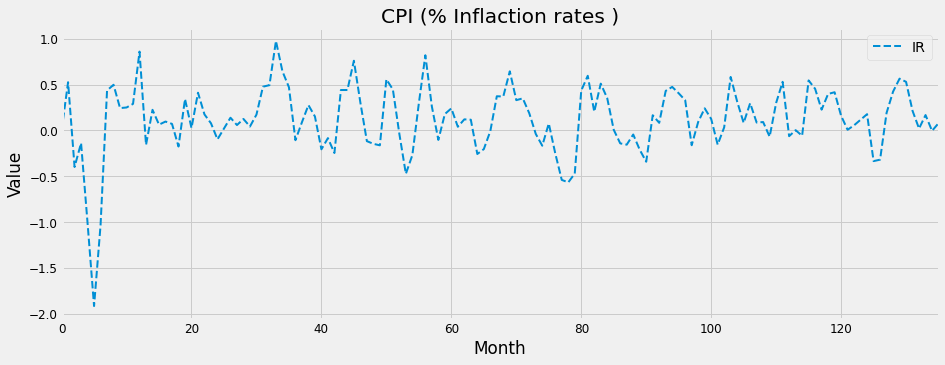

In [7]:
dfi=df.reset_index()#in order to have an index to regress (index)
dfi['date'] = pd.to_datetime(dfi['date'])

dfi = dfi.drop(['index','year', 'month','day','date','PriceStats','CPI','lIR'], axis=1)
plt.style.use('fivethirtyeight')
ax=dfi.plot(figsize=(14,5),fontsize = 12,linewidth = 2,linestyle='--')#(color='blue')
ax.set_xlabel('Month')
ax.set_ylabel('Value')
ax.set_title('CPI (% Inflaction rates )')
plt.show()

c.- (3 points) Statement of and justification for the chosen AR(p) model. Include plots and reasoning

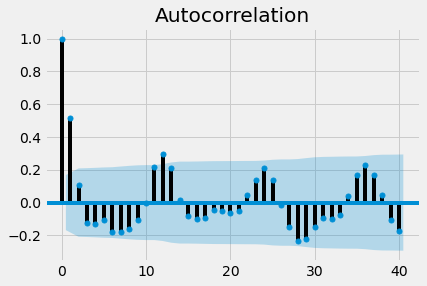

<Figure size 1440x480 with 0 Axes>

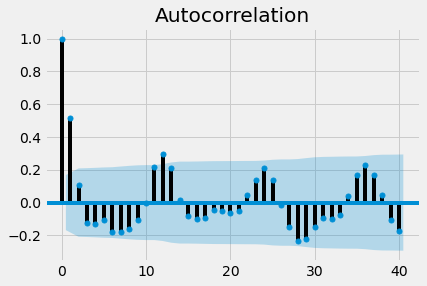

In [8]:
#There is not trend and not obvious periodic seasonal pattern
#so we will plot the ACF to see if there is a trend
figure(figsize=(18, 6), dpi=80)
sm.graphics.tsa.plot_acf(dfi.values.squeeze(), lags=40)

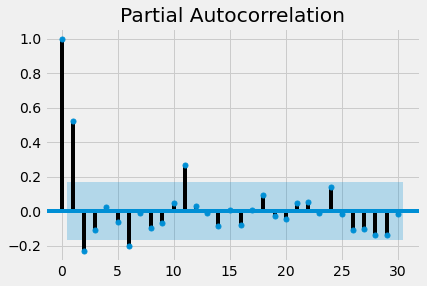

<Figure size 1440x480 with 0 Axes>

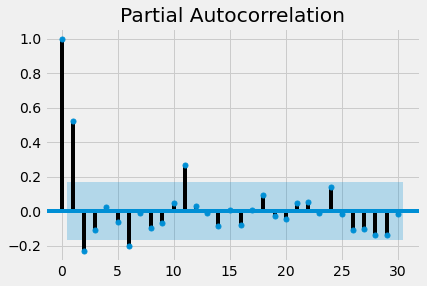

In [9]:
#we detect an periodic trend so we will plot a PACF to see what the parameter p of AR  model could be
figure(figsize=(18, 6), dpi=80)
sm.graphics.tsa.plot_pacf(dfi.values.squeeze(), lags=30)

d.- (3 points) Description of the final model; computation and plots of the 1 month-ahead forecasts for the validation data. In your plot, overlay predictions on top of the data.

In [10]:
dfi_train=dfi.loc[df['date'] <'2013-09-01']
dfi_test=dfi.loc[df['date'] >='2013-09-01']
dfi_train.shape,dfi_test.shape

((62, 1), (74, 1))

p= 1  Test RMSE:  0.24505842017614304


/home/manuel-gabriel/anaconda3/envs/r-env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


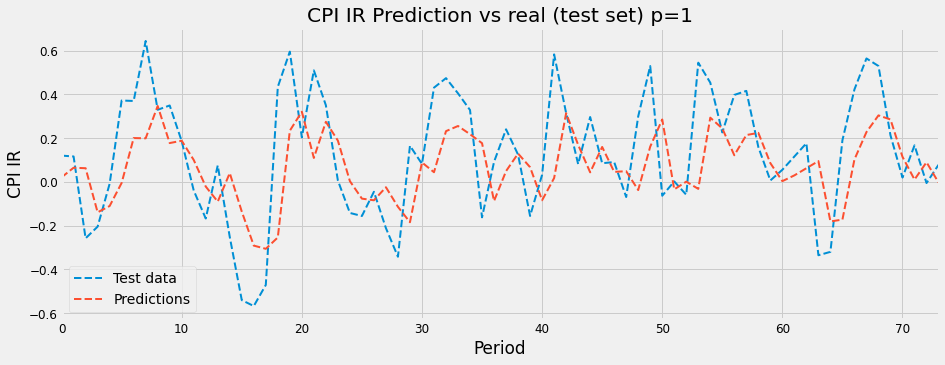

/home/manuel-gabriel/anaconda3/envs/r-env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


p= 2  Test RMSE:  0.2418465414720991


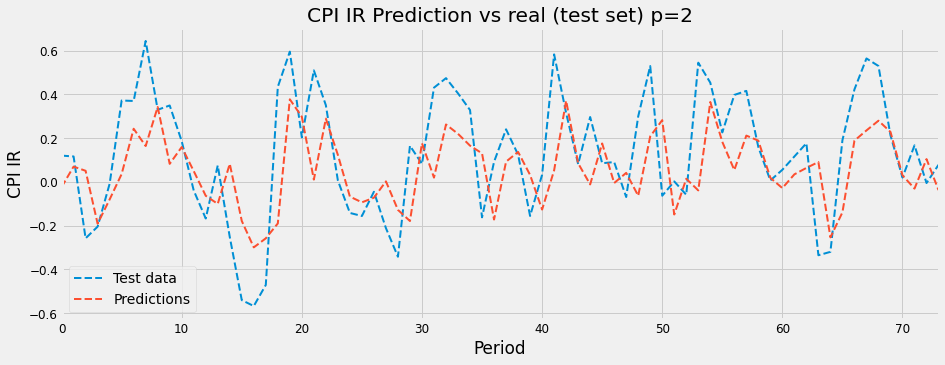

/home/manuel-gabriel/anaconda3/envs/r-env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


p= 6  Test RMSE:  0.25668476714130367


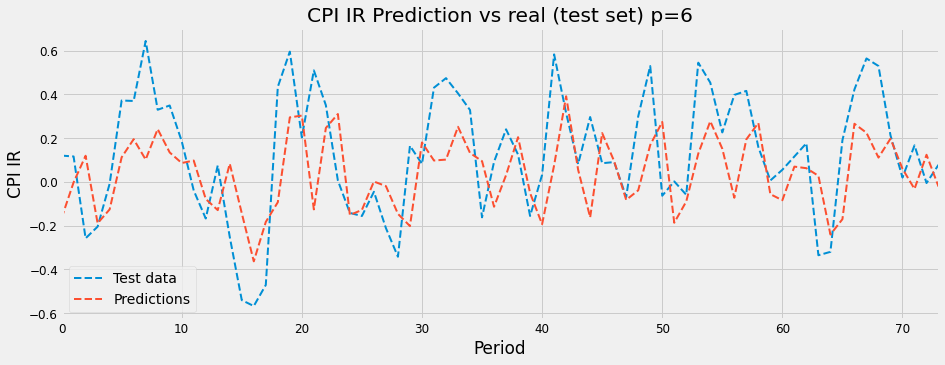

/home/manuel-gabriel/anaconda3/envs/r-env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


p= 11  Test RMSE:  0.2705590852945395


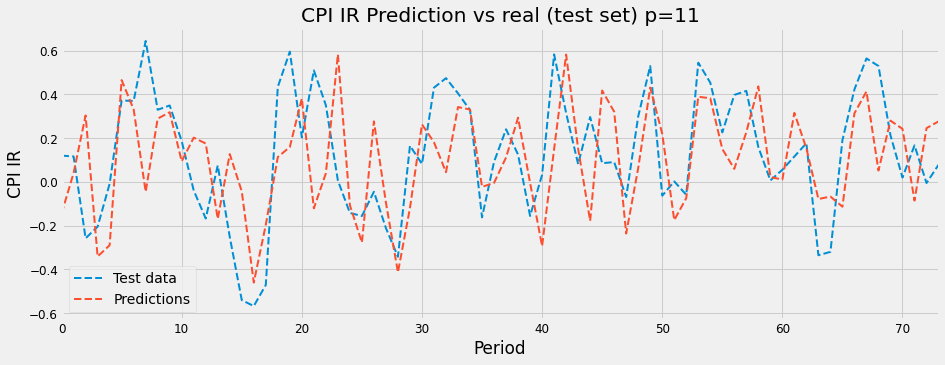

In [11]:
#we will try autoregression with parameters p=1,2,6,11
p=1   #<<<<<<<<<<<<<<<<<<<<<<-------------------
_RMSE=[]
_PP=[1,2,6,11]
for p in (_PP):
    res=AutoReg(dfi_train,p,trend='n').fit()
    #print (res.summary())

    #compute RMSE

    xRt=dfi_train.values
    xRtt=dfi_test.values

    res=AutoReg(xRt,p,trend='n').fit()
    #model = AR(train)
    #model_fit = model.fit()
    window = p #model_fit.k_ar
    coef = res.params #model_fit.params
    # walk forward over time steps in test
    history = xRt[len(xRt)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(xRtt)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = 0 #coef[0]
        for d in range(window):
            yhat += coef[d] * lag[window-d-1]
        obs = xRtt[t]
        predictions.append(yhat[0])
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    rmse = np.sqrt(mean_squared_error(xRtt, predictions))
    print('p=',p,' Test RMSE: ',rmse)
    _RMSE.append(rmse)
    
    s1 = pd.Series(xRtt.ravel())
    s2 = pd.Series(predictions)

    frame = { 'Test data': s1 ,'Predictions':s2}
    dpr3 = pd.DataFrame(frame)

    plt.style.use('fivethirtyeight')
    ax=dpr3.plot(figsize=(14,5),fontsize = 12,linewidth = 2,linestyle='--')#(color='blue')
    ax.set_xlabel('Period')
    ax.set_ylabel('CPI IR')
    ax.set_title('CPI IR Prediction vs real (test set) p='+str(p))
    plt.show()


2.- (3 points) Which AR(p) model gives the best predictions? Include a plot of the RSME againt different lags p for the model.

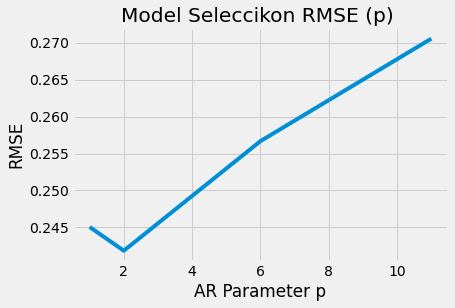

In [12]:
plt.style.use('fivethirtyeight')
plt.xlabel('AR Parameter p')
plt.ylabel('RMSE')
plt.title('Model Seleccikon RMSE (p) ')
plt.plot(_PP,_RMSE)
plt.show()

END WRITTEN

Inflation Rate from Price Stats

How about from Price Stats data? Note that PriceStats data is reported on a daily basis and there may be multiple ways to calculate a "monthly" inflation rate. For the methods described below, report the monthly inflation rate calculated using the PriceStats data for Feb, 2013.

Method I:

Compute the monthly inflation rate as the percentage change of PriceStats per month using a representative value of PriceStats

IRm=(PriceStatsm−PriceStatsm−1)/PriceStatsm−1
 
where m indexes the months, and PriceStatsm is a representative value of PriceStats of the month m.

There are different monthly representatives we can choose. Plot the monthly inflation rate calculated by the formula above and the following representative values of PriceStats of the month m. Report below the value for February, 2013.

PriceStats(m) average of month (m)

In [13]:
df3=Prices.groupby(['year','month']).agg(
    # Get max of the duration column for each group
    date=('date', 'first'),
    # Get min of the duration column for each group
    count=('date', 'count'),
    # Get sum of the duration column for each group
    PSm=('PriceStats', 'mean')    
)
df3=df3.reset_index()

IRc=[]
#lIRc=[]
CPIt_1=df3.iloc[0]['PSm']
for i in range (len(df3)):
    CPIt=df3.iloc[i]['PSm']
    IR=((CPIt-CPIt_1)/CPIt_1)*100
    #lIR=(np.log(CPIt)-np.log(CPIt_1))*100
    CPIt_1=CPIt
    IRc.append(IR)
    #lIRc.append(lIR)
df3['PSIR']=IRc
#df['lIR']=lIRc
df3.iloc[55:56]

,year,month,date,count,PSm,PSIR
55,2013,2,2013-02-01,28,107.118225,1.035869


PriceStats(m) last day of month (m)  ...(m-1)

In [14]:
df4=Prices.groupby(['year','month']).agg(
    # Get max of the duration column for each group
    date=('date', 'first'),
    # Get min of the duration column for each group
    PSf=('PriceStats', 'first'),
    # Get sum of the duration column for each group
    #PSl=('PriceStats', 'last') ,   
    PSm=('PriceStats', 'last')  
)
df4=df4.reset_index()

IRc=[]
#lIRc=[]
CPIt_1=df4.iloc[0]['PSm']
for i in range (len(df4)):
    CPIt=df4.iloc[i]['PSm']
    IR=((CPIt-CPIt_1)/CPIt_1)*100
    #lIR=(np.log(CPIt)-np.log(CPIt_1))*100
    CPIt_1=CPIt
    IRc.append(IR)
    #lIRc.append(lIR)
df4['PSIR']=IRc
#df['lIR']=lIRc
df4.iloc[55:56]

,year,month,date,PSf,PSm,PSIR
55,2013,2,2013-02-01,106.4377,107.5937,1.159453


Method II: Calculate daily inflation rates (i.e. the percentage change of PriceStats per day). Then take the average of daily inflation rates across all days of the month to get a representative of the monthly inflation rate. Finally, multiplication by 30 to change the units from per day to per month.

Plot the monthly inflation rate for this method and report the value for February, 2013.

In [15]:
df5=Prices.copy()
IRc=[]
#lIRc=[]
CPIt_1=df5.iloc[0]['PriceStats']
for i in range (len(df5)):
    CPIt=df5.iloc[i]['PriceStats']
    IR=((CPIt-CPIt_1)/CPIt_1)*100
    #lIR=(np.log(CPIt)-np.log(CPIt_1))*100
    CPIt_1=CPIt
    IRc.append(IR)
    #lIRc.append(lIR)
df5['DIR']=IRc
df5=df5.groupby(['year','month']).agg(
    # Get max of the duration column for each group
    date=('date', 'first'),
    # Get min of the duration column for each group
    count=('date', 'count'),
    # Get sum of the duration column for each group
    DIM=('DIR', 'mean')    
)
df5=df5.reset_index()
df5['mDIM']=df5['DIM']*30
#df['lIR']=lIRc
df5.iloc[55:56]

,year,month,date,count,DIM,mDIM
55,2013,2,2013-02-01,28,0.041184,1.235507


Inflation Rate from BER

BER data is not only reported on a daily basis but the values are calculated over a 10 year period. In order to use this data to get the "monthly" inflation rate one must

Choose a representative value of BER for each month (e.g. the average or the value on the last day of the month);

“Deannualize" the monthly representatives above to convert to the monthly inflation rate. This deannualization of BER can be done by using the formula

BERmonthlyt=(((BERyearlyt/100)+1)(1/12))−1
 
where t indexes the days.

Use the average value of BER over each month as the monthly representative, and deannualize this value to find the monthly inflation rate. Report the monthly inflation rate for Feb, 2013

In [16]:
BER=pd.read_csv('T10YIE.csv',keep_default_na=True)
BER['date'] = pd.to_datetime(BER['DATE'])
BER['year']=pd.DatetimeIndex(BER['date']).year
BER['month']=pd.DatetimeIndex(BER['date']).month
BER['day']=pd.DatetimeIndex(BER['date']).day

df6=BER.groupby(['year','month']).agg(
    # Get max of the duration column for each group
    date=('date', 'first'),
    # Get min of the duration column for each group
    count=('date', 'count'),
    # Get sum of the duration column for each group
    BEy=('T10YIE', 'mean')    
)
df6=df6.reset_index()

df6['BEm']=(((df6['BEy'])+1)**(1/12))-1
df6=df6.set_index('date')
df6['2013']

,year,month,count,BEy,BEm
date,,,,,
2013-01-01,2013,1,23,2.523333,0.110656
2013-02-01,2013,2,20,2.554737,0.111477
2013-03-01,2013,3,21,2.542500,0.111158
2013-04-01,2013,4,22,2.411364,0.107671
2013-05-01,2013,5,23,2.283182,0.104141
2013-06-03,2013,6,20,2.048500,0.097338
2013-07-01,2013,7,23,2.122273,0.099527
2013-08-01,2013,8,22,2.184545,0.101338
2013-09-02,2013,9,21,2.145500,0.100206


Include your answers to this question in your written report.

(3 points) Overlay your estimates of monthly inflation rates and plot them on the same graph to compare. (There should be 4 lines, one for each dataset, plus the predictions) over time (months from September 2013 onward).

In [17]:
s0=df['date']
s1=df['IR']
s2=df['lIR']
s3=df3['PSIR']
s4=df4['PSIR']
frame = { 'IR': s1, 'log_IR': s2 ,'Daily_mean_IR':s3,'Daily_las_IR':s4}
df7 = pd.DataFrame(frame)
df7

,IR,log_IR,Daily_mean_IR,Daily_las_IR
0,0.000000,0.000000,0.000000,0.000000
1,0.525100,0.523726,-0.193995,-0.213643
2,-0.399204,-0.400003,0.043435,0.054057
3,-0.138249,-0.138344,-0.760972,-1.726423
4,-1.010138,-1.015274,-1.807454,-1.462844
...,...,...,...,...
131,0.212866,0.212639,-0.046040,-0.112548
132,0.019908,0.019906,0.087593,0.151478
133,0.167095,0.166955,-0.010629,-0.092072
134,-0.005117,-0.005117,0.098590,0.278083


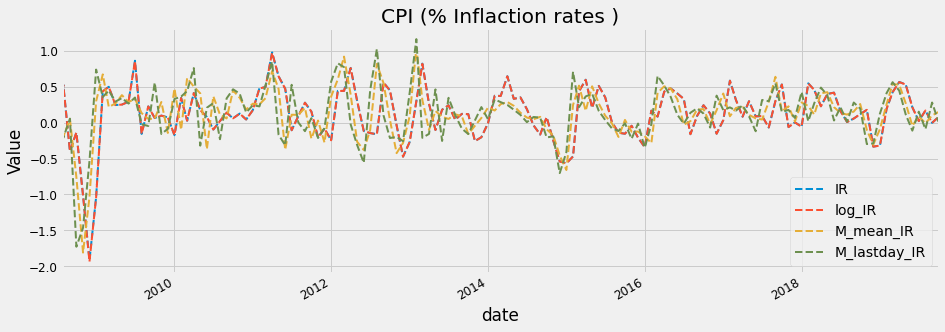

In [18]:
s0=df['date']
s1=df['IR']
s2=df['lIR']
s3=df3['PSIR']
s4=df4['PSIR']
frame = { 'date':s0,'IR': s1, 'log_IR': s2 ,'M_mean_IR':s3,'M_lastday_IR':s4}
df7 = pd.DataFrame(frame)
df7=df7.set_index('date')

plt.style.use('fivethirtyeight')
ax=df7.plot(figsize=(14,5),fontsize = 12,linewidth = 2,linestyle='--')#(color='blue')
ax.set_xlabel('date')
ax.set_ylabel('Value')
ax.set_title('CPI (% Inflaction rates )')
plt.show()